# Phase Retrieval of 3D Images  
Jack Greisman  
March 7, 2018

In [1]:
# Setup Notebook
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)
import numpy as np
import phase_mixing_utils
from PhaseRetrieval import PhaseRetrieval
from scipy import stats

/Users/jgreisman/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


Our test data is going to be a single 3D Gaussian

In [25]:
# 3D Gaussian
x, y, z = np.mgrid[0.0:1.0:50j, 0.0:1.0:50j, 0.0:1.0:50j]
xyz = np.column_stack([x.flat, y.flat, z.flat])

mu = np.array([0.5, 0.5, 0.5])

sigma = np.array([.1, .1, .1])
covariance = np.diag(sigma**2)

gauss3d = stats.multivariate_normal.pdf(xyz, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
gauss3d = gauss3d.reshape(x.shape)

# Normalize
gauss3d = (gauss3d - gauss3d.min()) / (gauss3d.max() - gauss3d.min())

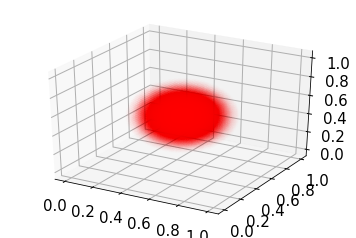

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgba_colors = np.zeros((125000,4))
# for red the first column needs to be one
rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
rgba_colors[:, 3] = gauss3d.flatten()

ax.scatter3D(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=rgba_colors)
plt.show()

In [5]:
gauss3dfft = np.fft.fftn(gauss3d)
mags = phase_mixing_utils.get_mag(gauss3dfft)

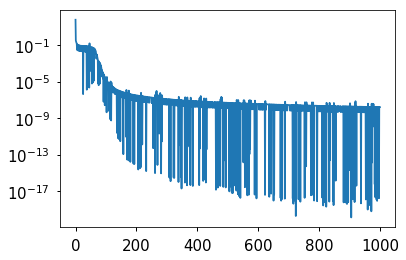

In [14]:
pr = PhaseRetrieval(mags)
pr.hybrid_input_output(beta=0.5, n_iter=1000, freq=0.5)
plt.semilogy(pr.err_track)

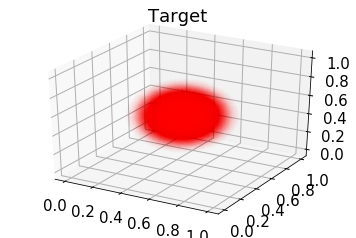

ValueError: c of shape (125000, 4) not acceptable as a color sequence for x with size 125000, y with size 125000

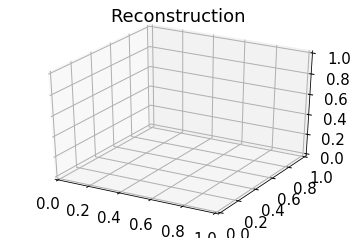

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
rgba_colors = np.zeros((125000,4))
# for red the first column needs to be one
rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
rgba_colors[:, 3] = gauss3d.flatten()
ax.scatter3D(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=rgba_colors)
ax.set_title("Target")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
rgba_colors = np.zeros((125000,4))
# for red the first column needs to be one
rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
rgba_colors[:, 3] = pr.rs_track[np.argmin(pr.err_track)].flatten()
ax.set_title("Reconstruction")
ax.scatter3D(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=rgba_colors)
plt.show()

This seems to be working pretty well

1.3702964220333543e-20